<a href="https://colab.research.google.com/github/vannessa01/Investigate-Hotel-Ainstein-Business/blob/main/Investigate_Hotel_Ainstein_Business_with_Data_Visualization_(fix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigate Hotel Business With Data Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Dataset

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Portofolio/Mini Project/Investigate Hotel Business using Data Visualization/fix/hotel_bookings_data.csv')
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [ ]:
# View information from data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Check the statistical description of the dataframe
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Data Preprocessing

### Handling Null Values

In [ ]:
# check NULL Values
df1.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
##Replace NULL Values
##There are 4 columns containing NULL Values

#The children column is filled with the number 0 which means that there are no children in the hotel booking data
df1['children'] = df1['children'].fillna(0)

#The city column is filled with "Unknown" because the country of origin of the hotel booker is not known
df1['city'] = df1['city'].fillna('Unknown')

##The agent and company column can be filled with 0 or "undefined" value, because there is no 0 for agent and company (minimum agent value: 1, maximum company value: 6)
df1['agent'] = df1['agent'].fillna(0)
df1['company'] = df1['company'].fillna(0)

In [ ]:
# check NULL Values
df1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Handling incorrect data type

In [ ]:
#Changing the incorrect data type
df1['children'] = df1['children'].astype('int64')
df1['agent'] = df1['agent'].astype('int64')
df1['company'] = df1['company'].astype('int64')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

### Handling incorrect values

In [ ]:
df1['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [ ]:
#Replace the 'Undefined' in 'meal' column with 'No Meal'
df1['meal'] = df1['meal'].replace(['Undefined'], 'No Meal')

In [ ]:
df1['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### Drop unnecessary data

In [ ]:
#Create total guest data, namely the number of adults, children, and babies
df1['total_customer'] = df1['adults'] + df1['children'] + df1['babies']
print("Data with 0 guest: {0} out of {1} all data".format(df1[df1["total_customer"] == 0].shape[0], df1.shape[0]))

# Delete data that has 0 guest
df_prep = df1[df1["total_customer"] > 0].copy()
df_prep.shape

Data with 0 guest: 180 out of 119390 all data


(119210, 30)

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

In [ ]:
df_prep.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customer
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,No Deposit,303,0,0,Personal,103.0,0,1,Check-Out,2
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,No Deposit,240,0,0,Personal,82.0,0,1,Canceled,2
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,No Deposit,15,0,0,Personal,105.5,0,0,Canceled,2


In [ ]:
df_prep['total_customer'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55, 20,  6, 10])

In [ ]:
#df1.drop(df1[df1['total_customer'] == 0].index, inplace = True)

In [ ]:
df_prep['total_customer'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55, 20,  6, 10])

In [ ]:
df_prep['arrival_date_year'].unique()

array([2017, 2018, 2019])

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

### Handling duplicated data

In [ ]:
df_prep.duplicated().sum()

33246

## Data Visualization 1
## Analysis of Number of Hotel Bookings per Month by Hotel type

In [ ]:
# Copy the preprocessed data
dfc = df_prep.copy()

In [ ]:
# Create aggregation data to calculate the number of hotel bookings per month by hotel type
dfc_gr = dfc.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
dfc_gr.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking'] # mengubah nama kolom tabel
dfc_gr

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


Data for July and August are taken from data from 3 years ago, while other months are only taken from data from 2 years ago, normalization needs to be done so that the comparison is appropriate.

In [ ]:
# normalize the data to get the average number of orders in a month in different years
dfc_gr['average_num_booking'] = round(dfc_gr['num_booking']/dfc_gr['unique_year'])
dfc_gr.head()

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0


In [ ]:
# Sorts data by month, and abbreviates month names for easier visualization
ordered_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dfc_gr["month"] = dfc_gr["arrival_month"].str[:3] #take the first 3 letters of each month
dfc_gr["month"] = pd.Categorical(dfc_gr["month"], categories=ordered_months, ordered=True) #sort the month

dfc_gr.head()

,hotel_type,arrival_month,unique_year,num_booking,average_num_booking,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan


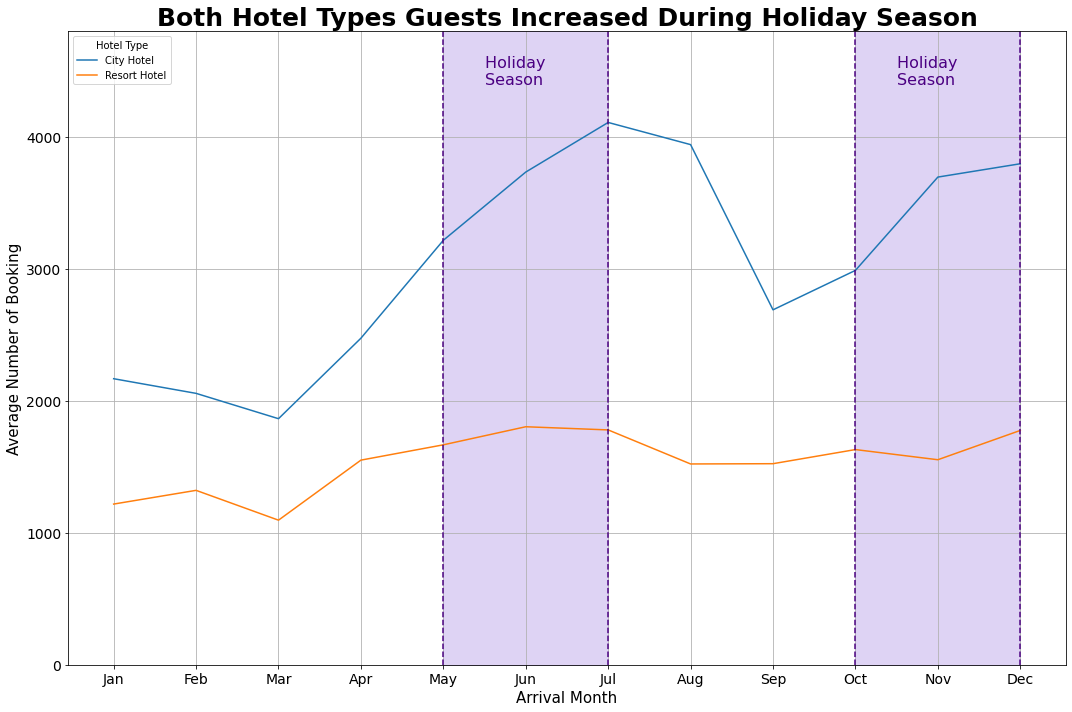

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='month', y='average_num_booking', hue='hotel_type', data= dfc_gr)

plt.title('Both Hotel Types Guests Increased During Holiday Season', fontsize=25, fontweight='bold') #add title

plt.xlabel('Arrival Month', fontsize=15) #set title on x-axis
plt.ylabel('Average Number of Booking', fontsize=15) #set title on y-axis
plt.ylim(0, 4800) #limiting y axis

plt.text(x=4.5, y=4400, s='Holiday \nSeason', fontsize=16, color='indigo') #add caption
plt.stackplot(np.arange(4,7,1), [[4800]], color='mediumpurple', alpha=0.3) #give color blocks to the highlighted area 2 vertical lines
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='indigo') #add caption
plt.stackplot(np.arange(9,12,1), [[4800]], color='mediumpurple', alpha=0.3) #give color block

plt.tick_params(axis='both', which='major', labelsize=14) #increase the size of the x-y axis label
plt.grid() #add gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) #set title and font size on legend

plt.axvline(x = 4, color='indigo', linestyle='--') #add vertical lines to highlight insight
plt.axvline(x = 6, color='indigo', linestyle='--') #add vertical lines to highlight insight
plt.axvline(x = 9, color='indigo', linestyle='--') #add vertical lines to highlight insight
plt.axvline(x = 11, color='indigo', linestyle='--') #add vertical lines to highlight insight

plt.legend(title="Hotel Type")
plt.tight_layout() #adjust the layout of the visualization so that it doesn't get cut off
plt.show()

## Data Visualization 2
## Analysis of the Effect of Stay Duration on the Cancellation Rate of Hotel Bookings

In [ ]:
dfu = df_prep.copy()

In [ ]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

In [ ]:
dfu['booking_duration'] = dfu.stays_in_weekend_nights + dfu.stays_in_weekdays_nights

In [ ]:
dfu = dfu.sort_values(by = ['booking_duration'])
dfu['booking_duration']

0         0
19243     0
19241     0
19239     0
95212     0
         ..
54704    48
9839     56
33924    56
14037    60
14038    69
Name: booking_duration, Length: 119210, dtype: int64

In [ ]:
dfu.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customer,booking_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,0,0,Personal,0.0,0,0,Check-Out,2,0
19243,Resort Hotel,0,0,2017,February,50,11,0,0,1,...,0,0,0,Personal,0.0,0,0,Check-Out,1,0
19241,Resort Hotel,0,1,2017,February,50,11,0,0,1,...,0,154,0,Personal,0.0,0,0,Check-Out,1,0
19239,Resort Hotel,0,3,2017,February,50,10,0,0,2,...,240,0,0,Personal,0.0,0,2,Check-Out,3,0
95212,City Hotel,0,12,2018,October,34,16,0,0,2,...,9,0,0,Personal,0.0,0,1,Check-Out,2,0


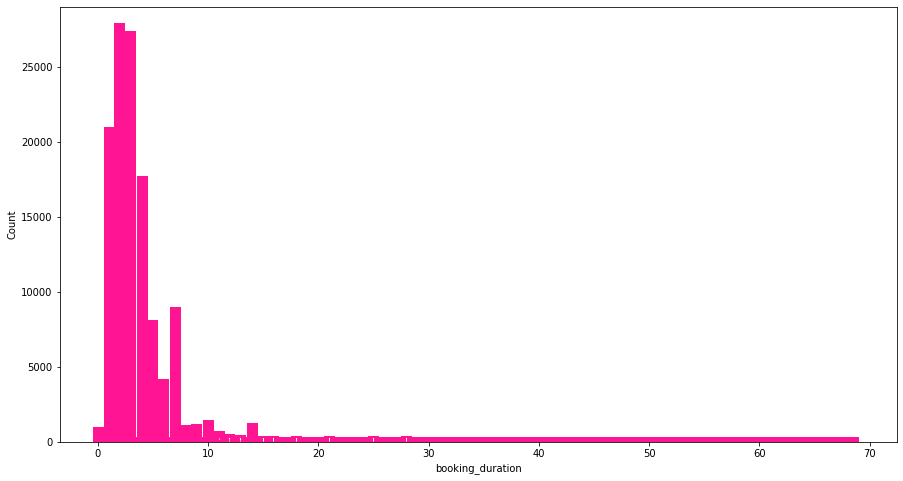

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(x = 'booking_duration', data = dfu,
            color = 'hotpink',
            edgecolor= 'deeppink', 
            linewidth = 10)
plt.show()

Based on the histogram above, it can be seen that the distribution of the data looks right-skewed. Therefore, grouping is done to make the distribution more even. The grouping is done for the total number of nights that reach 3 weeks, then grouped from the 15th night to the 21st night (15-21). Further, for total nights of more than 3 weeks (>21).

In [ ]:
# grouping data based on observations of data distribution
dfu['booking_duration_group'] = np.where(dfu['booking_duration'] > 21, 21, 
                                       np.where(dfu['booking_duration'] > 14, 15, dfu['booking_duration']))

# create aggregate table
dfu_gr = dfu.groupby(['hotel', 'is_canceled', 'booking_duration_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
dfu_p = dfu_gr.pivot_table(index=['hotel', 'booking_duration_group'], columns='is_canceled', values='num_bookings').reset_index()
dfu_p['pct_canceled'] = round(dfu_p[1]*100.0/(dfu_p[0]+dfu_p[1]), 2)

dfu_p.head(100)

is_canceled,hotel,booking_duration_group,0,1,pct_canceled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87



The purpose of the plot that we want to display is to compare 2 types of hotels to the duration of the customer's stay, so a bar chart is used to see the rate of cancellation of hotel reservations. Additionally, we'll see how the length of stay affects the cancellation rate of hotel bookings so that the trends for that data are also shown.

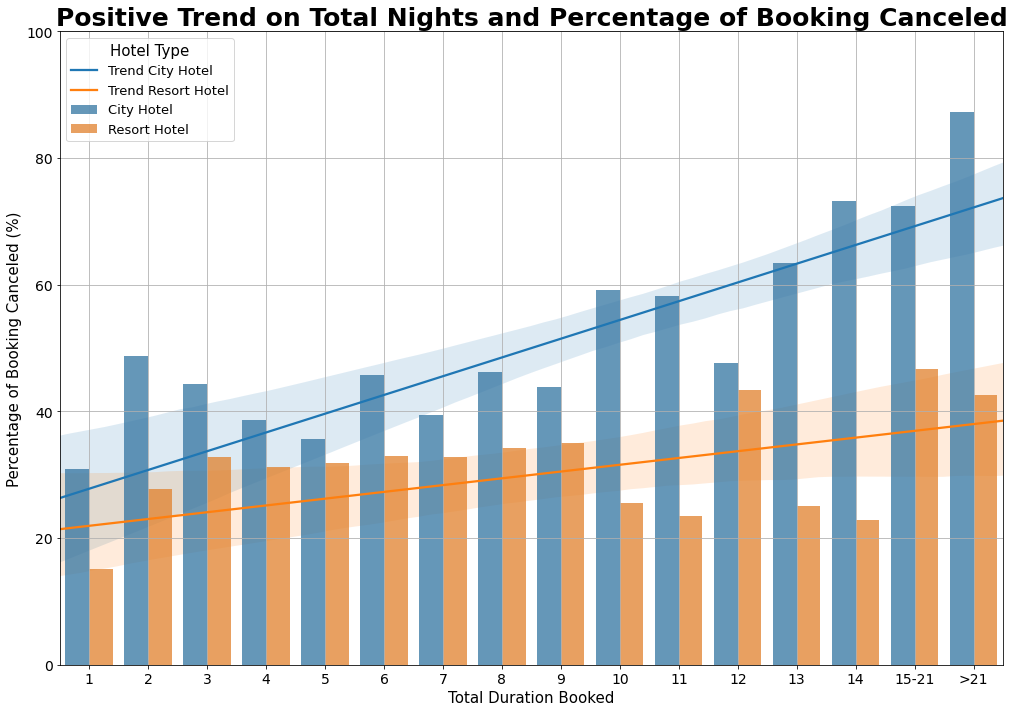

In [ ]:
plt.figure(figsize=(15,10))
sns.regplot(x='booking_duration_group', y='pct_canceled', data=dfu_p[dfu_p['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='booking_duration_group', y='pct_canceled', data=dfu_p[dfu_p['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='booking_duration_group', y='pct_canceled', hue='hotel', data=dfu_p, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14) #increase the size of the x-y axis label
plt.grid() #add gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) #set title and font size on legend

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"]) #set customized-label on x-axis
plt.xlabel('Total Duration Booked', fontsize=15) #set title on x-axis
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) #set title on y-axis
plt.ylim(0, 100) #limiting y axis
plt.xlim(0.5, 16.5) #limiting x axis

plt.title('Positive Trend on Total Nights and Percentage of Booking Canceled', fontsize=25, fontweight='bold') #give title

plt.tight_layout() #adjust the layout of the visualization so that it doesn't get cut off

The longer the total nights booked, the higher the percentage of booking being canceled, also City Hotel has more steeper trend compared to Resort Hotel.

## Data Visualization 3
## Analysis of the Effect of Booking Timeline on the Cancellation Rate of Hotel Bookings

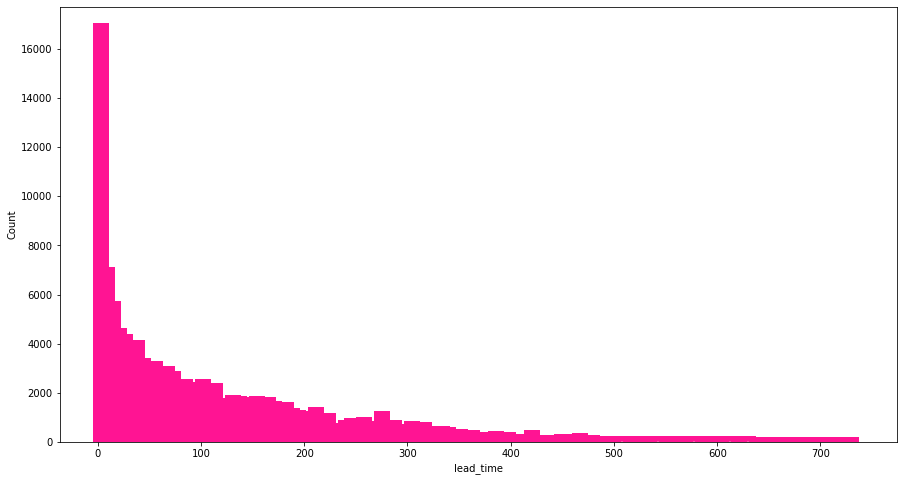

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(x = 'lead_time', data = dfu,
            color = 'hotpink',
            edgecolor= 'deeppink', 
            linewidth = 10)
plt.show()

Based on the histogram above, it can be seen that the distribution of the data looks right-skewed. Therefore, grouping is done to make the distribution more even. The order time interval, originally in daily units, is grouped into monthly units per 30 days.

In [ ]:
#Categorize the lead_time column to make it simpler
dfu['lead_times'] = np.where(dfu['lead_time'] > 400, 401, dfu['lead_time']) #lead_time with a large enough value (more than 400) is categorized into one group
bins = list(np.arange(0,max(dfu['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
dfu['lead_time_group'] = pd.cut(dfu['lead_times'],bins=bins, include_lowest=True, labels=labels) #groupping lead_time for every multiple of 30

In [ ]:
#perform data aggregation to calculate the number of bookings based on the lead_time group that has been created and by hotel type
dfu_book = dfu.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
dfu_p = dfu_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
dfu_p.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
dfu_p['all_bookings'] = dfu_p['not_canceled']+dfu_p['canceled']
dfu_p['pct_canceled'] = dfu_p['canceled']*100.0/(dfu_p['all_bookings']) 

dfu_p.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5184,23244,22.302530
1,City Hotel,30-60,7266,4608,11874,38.807479
2,City Hotel,60-90,5210,3692,8902,41.473826
3,City Hotel,90-120,3956,3486,7442,46.842247
4,City Hotel,120-150,3064,2542,5606,45.344274


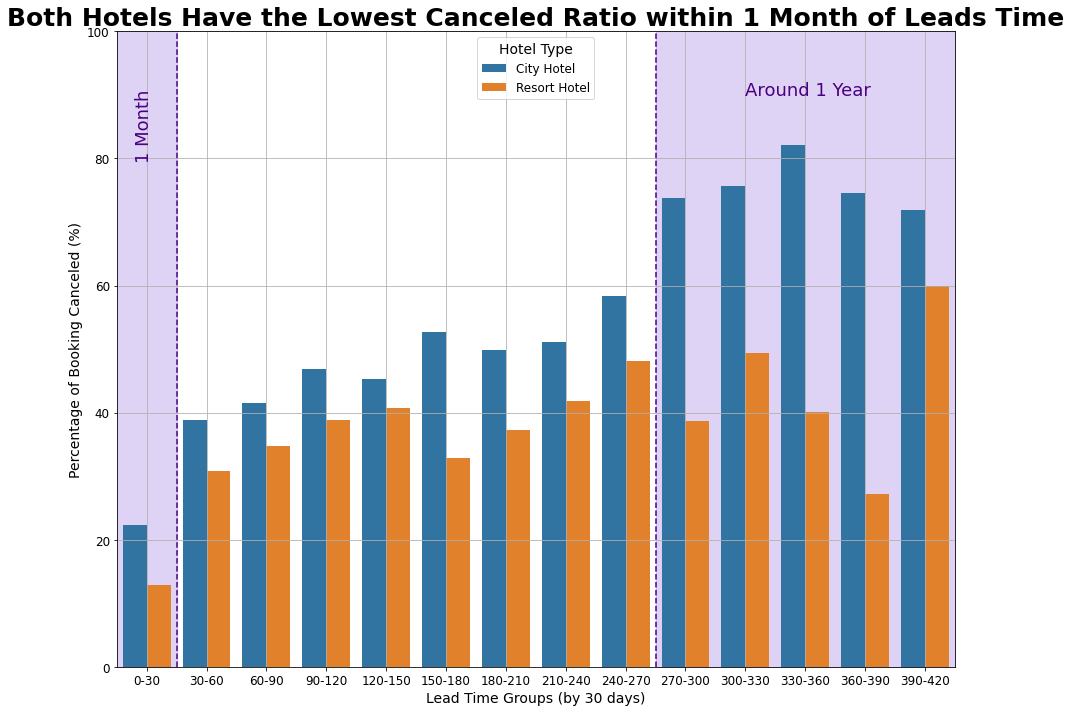

In [ ]:
plt.figure(figsize=(15,10)) #set the size of the figure
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=dfu_p) #first plot using barplot from seaborn library

plt.tick_params(axis='both', which='major', labelsize=12) #increase the size of the x-y axis label
plt.grid() #add gridline
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) #set title and font size on legend

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) #set title on x-axis
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) #set title on y-axis
plt.ylim(0, 100) #limiting y-axis
plt.xlim(-0.5,13.5) #limiting x-axis

plt.axvline(0.5, ls='--', color='indigo') #create a vertical line to highlight insight
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='indigo', rotation=90) #add caption
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='mediumpurple', alpha=0.3) #give color blocks to the highlighted area 2 vertical lines

plt.axvline(8.5, ls='--', color='indigo') #create a vertical line to highlight insight
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='indigo') #add caption
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='mediumpurple', alpha=0.3) #give color blocks to the highlighted area 2 vertical lines

plt.title('Both Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time', fontsize=25, fontweight='bold') #add title
 
plt.tight_layout() #adjust the layout of the visualization so that it doesn't get cut off

Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled ratio (above 60%) with leads time around 1 year.